In [2]:
from IPython.display import HTML

HTML('<a target="_blank" href="https://colab.research.google.com/github/hoffman-lab/the-new-vandyhacks/blob/main/manifold_learning.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>')

In [8]:
# @title

from IPython.display import HTML

html_code = """
<video width="640" height="360" controls>
  <source src="https://raw.githubusercontent.com/hoffman-lab/the-new-vandyhacks/main/asset/monkey_movement.mp4" type="video/mp4">
</video>
"""
display(HTML(html_code))



[PCA](https://setosa.io/ev/principal-component-analysis/)




In [2]:
#@title Installation and Data Download


!pip install umap-learn

import numpy as np
from umap import UMAP
from sklearn.decomposition import PCA

import plotly.graph_objects as go
import matplotlib.pyplot

# Destination file path
destination = '/content/data.zip'  # Change 'filename.extension' to your desired file name and extension

# Using gdown to download the file
import gdown
file_id = '1dLP8XP6isjj7jrsM7lKY7CvjvZ06yJ6d'
gdown.download(f'https://drive.google.com/uc?id={file_id}', destination, quiet=False)



!unzip data.zip -d binned_spike

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 7.2 MB/s eta 0:00:00


Downloading...
From (original): https://drive.google.com/uc?id=1dLP8XP6isjj7jrsM7lKY7CvjvZ06yJ6d
From (redirected): https://drive.google.com/uc?id=1dLP8XP6isjj7jrsM7lKY7CvjvZ06yJ6d&confirm=t&uuid=14b8f950-17ed-4aae-bd42-d9403fcb68b7
To: /content/data.zip
100%|██████████| 10.5M/10.5M [00:00<00:00, 74.6MB/s]


Archive:  data.zip
  inflating: binned_spike/th_bh_100.npy  
  inflating: binned_spike/th_bh_500.npy  
  inflating: binned_spike/th_gaussians_100.npy  
  inflating: binned_spike/th_gaussians_500.npy  


# Set Data

In [8]:

bin_size=500
binned_data = np.load(f"/content/binned_spike/th_gaussians_{bin_size}.npy")
behavior_label=np.load(f"/content/binned_spike/th_bh_{bin_size}.npy")

In [9]:
filter=np.isin(behavior_label[1,:],[1,1.5,2,2.5, 3,3.5, 4,4.5,5])
spike_data = binned_data[filter,:]
bh_data = behavior_label[:,filter]





In [10]:
print(f"Number of bins {spike_data.shape[0]}\nNumber of cells {spike_data.shape[1]}  ")

print(f"Number of trials {np.max(bh_data[0,:])}\nUnique Epochs {np.unique(bh_data[1,:])}  ")
print(f"binned data shape: {spike_data.shape}")
print(f"behavior label shape: {bh_data.shape}")


Number of bins 2858
Number of cells 251  
Number of trials 40.0
Unique Epochs [1.  1.5 2.  2.5 3.  3.5 4.  4.5 5. ]  
binned data shape: (2858, 251)
behavior label shape: (4, 2858)


# PCA 3D Dimension Reduction and Visualization

In [11]:
# Create a 3D scatter plot
reducer =PCA(n_components=3)
embedding = reducer.fit_transform(spike_data)



In [12]:

fig = go.Figure(data=[go.Scatter3d(
    x=embedding[::5, 0],
    y=embedding[::5, 1],
    z=embedding[::5, 2],
    mode='markers',
    marker=dict(
        size=3,
        color=bh_data[0,::5],  # set color to the target values
        colorscale='jet',  # choose a colorscale
        opacity=0.8,
         colorbar=dict(thickness=20)
    )
)])

# Set the title and labels
fig.update_layout(title='3D Scatter plot of the PCA embedding',
                  scene=dict(xaxis_title='PCA 1',
                             yaxis_title='PCA 2',
                             zaxis_title='PCA 3'))

fig.show()

# Why could the PCA be failing?


## Susecptible to noise
## Non-linear DATA


# UMAP 3D Dimension Reduction and Visualization

[Hyper Parameter](https://pair-code.github.io/understanding-umap/)

In [17]:
# Create a 3D scatter plot
reducer =UMAP(n_components=3,n_neighbors = 10, metric = 'correlation',  learning_rate = 1.0,
                init = 'spectral', min_dist = .1, spread = 1.0, repulsion_strength =1.0,
                negative_sample_rate = 5, dens_lambda = 2.0, dens_frac = 0.3,
                dens_var_shift=0.1)
embedding = reducer.fit_transform(spike_data)



In [18]:

fig = go.Figure(data=[go.Scatter3d(
    x=embedding[::5, 0],
    y=embedding[::5, 1],
    z=embedding[::5, 2],
    mode='markers',
    marker=dict(
        size=3,
        color=bh_data[1,::5],  # set color to the target values
        colorscale='jet',  # choose a colorscale
        opacity=0.8,
        colorbar=dict(thickness=20)
    )
)])

# Set the title and labels
fig.update_layout(title='3D Scatter plot of the UMAP embedding',
                  scene=dict(xaxis_title='UMAP 1',
                             yaxis_title='UMAP 2',
                             zaxis_title='UMAP 3'))

fig.show()

In [19]:

  plt.figure(2)
  trial=4 # @param {type:"slider", min:0, max:40, step:1}
  plot_filter = bh_data[0,:] == trial
  plot_embedding = embedding[plot_filter,:]
  plot_bh_data = bh_data[:,plot_filter]

  sc = plt.scatter(plot_embedding[:,0], plot_embedding[:,1], c=plot_bh_data[1,:], cmap='jet', s=25)
  plt.colorbar(sc)
  plt.show()


NameError: name 'plt' is not defined

IntSlider(value=5, description='Trial:', max=40)

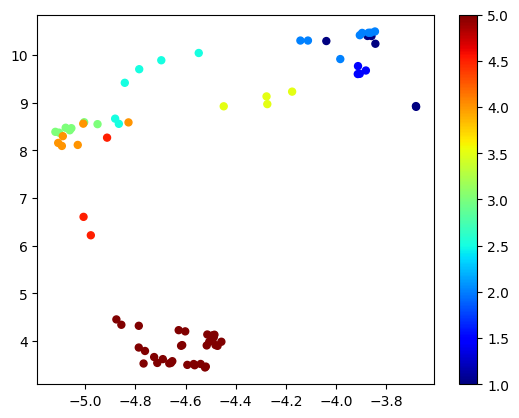

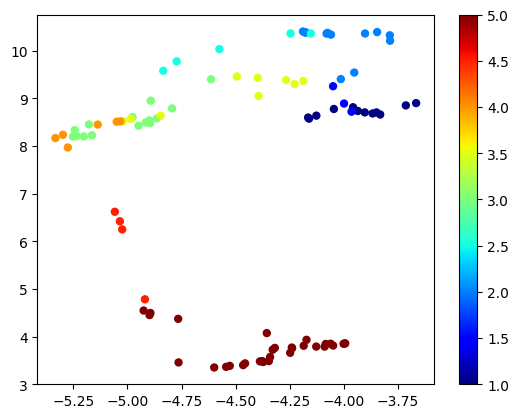

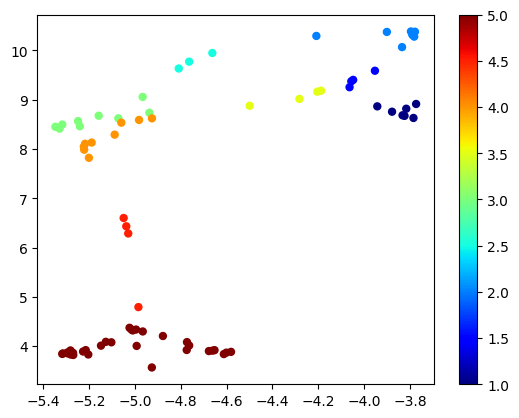

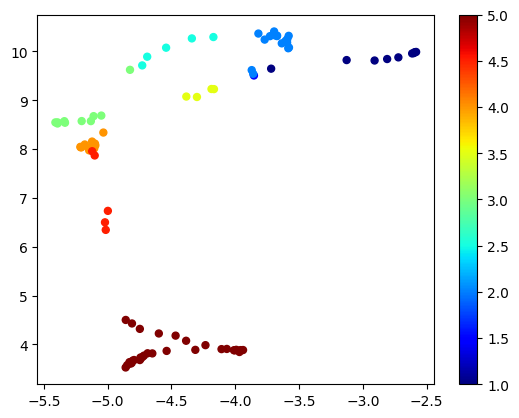

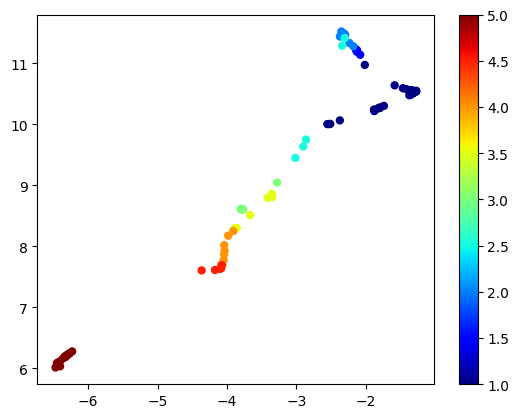

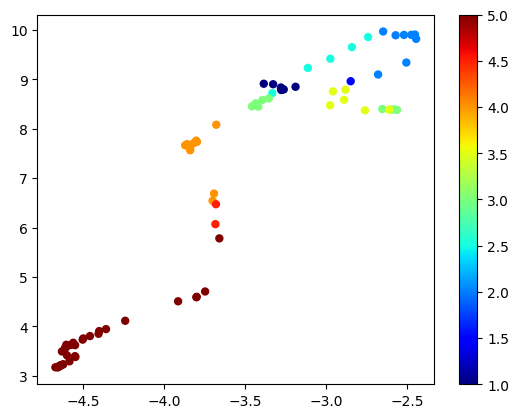

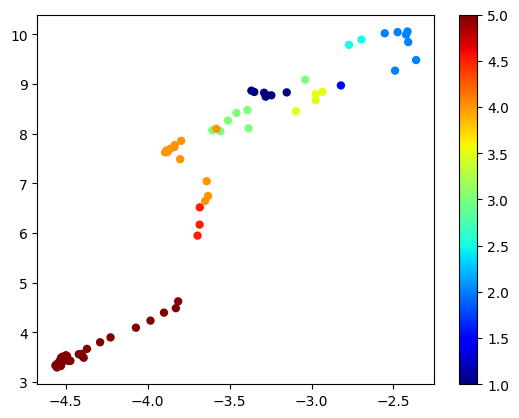

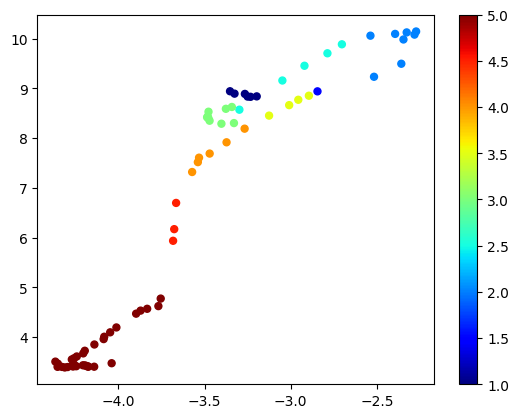

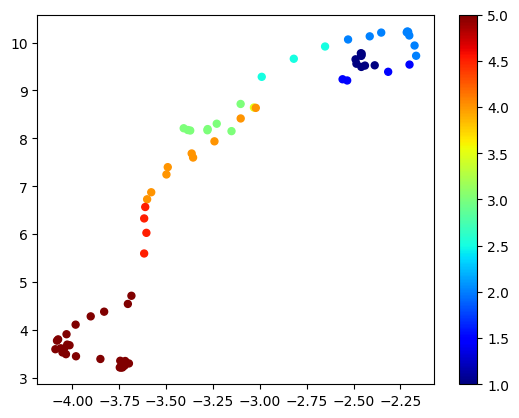

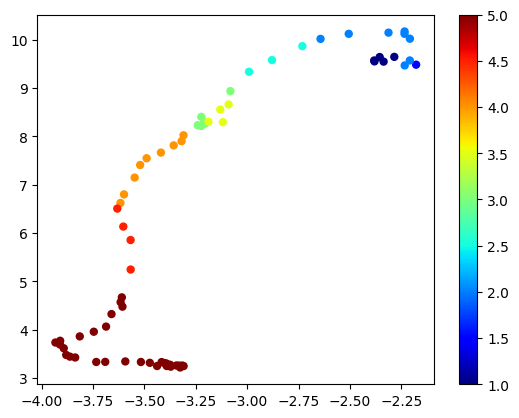

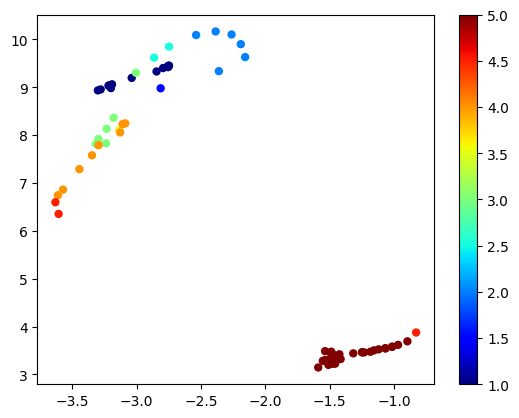

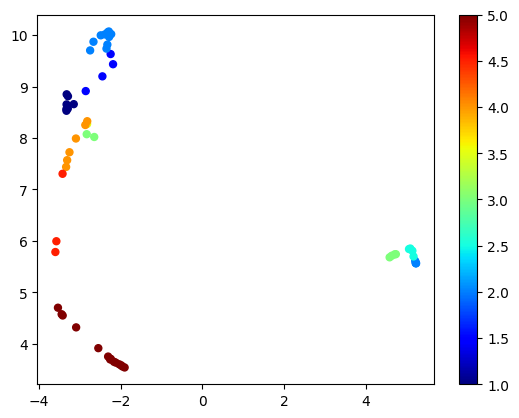

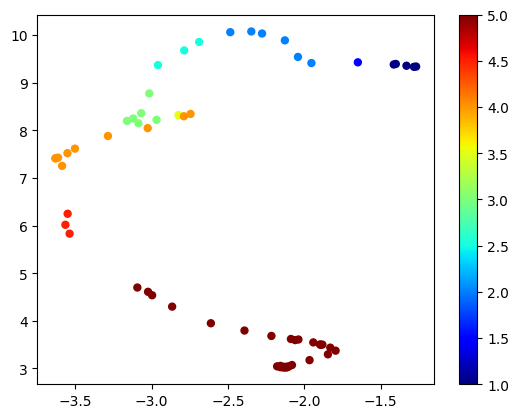

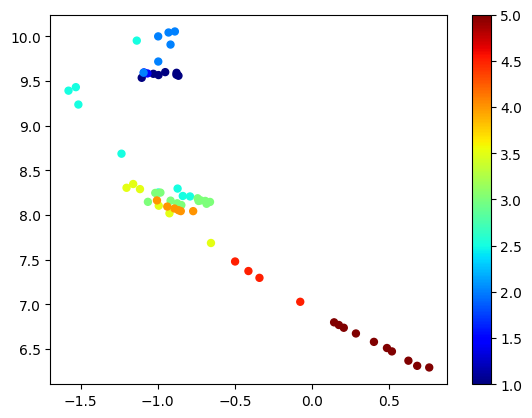

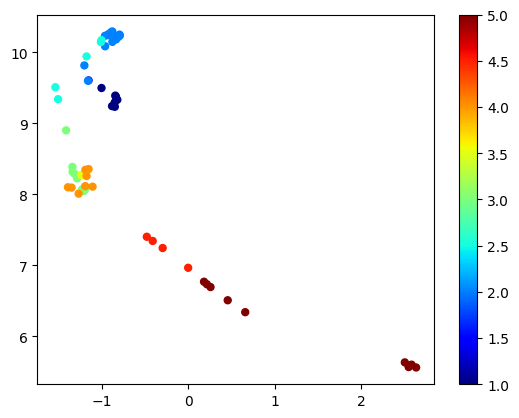

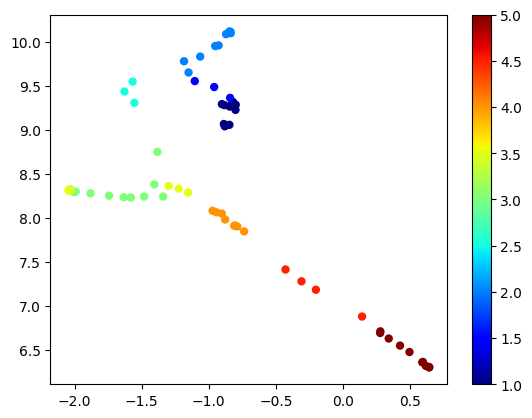

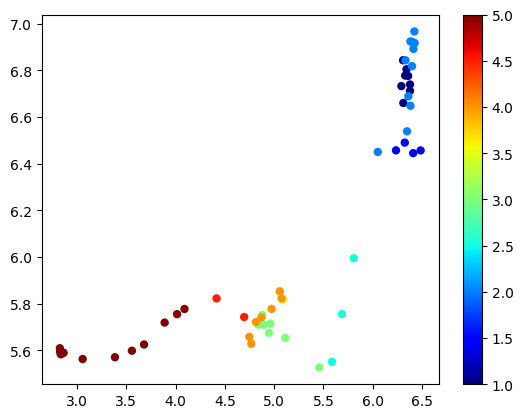

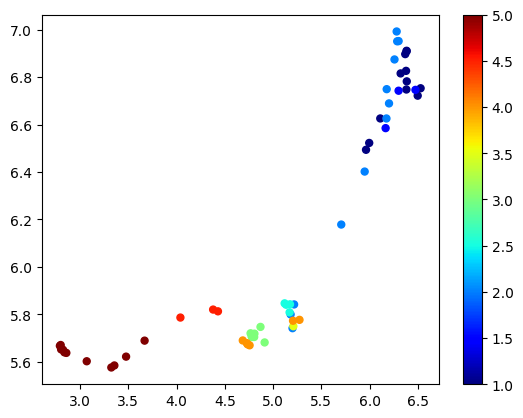

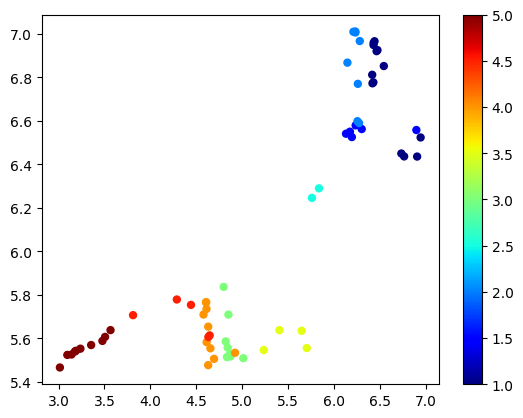

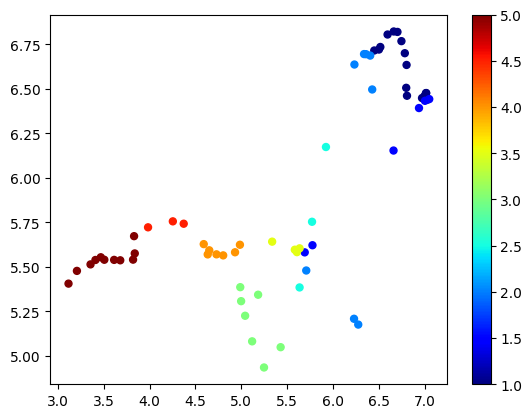

In [101]:
%matplotlib inline
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt


# Create a slider widget
slider = widgets.IntSlider(min=0, max=40, step=1, value=5,
                               description='Trial:',)

# Display the slider widget
display(slider)


# Function to update the plot
def update_plot(change):
    plt.close('all')
    plt.figure(2)
    plot_filter = bh_data[0,:] == slider.value
    plot_embedding = embedding[plot_filter,:]
    plot_bh_data = bh_data[:,plot_filter]

    sc = plt.scatter(plot_embedding[:,0], plot_embedding[:,1], c=plot_bh_data[1,:], cmap='jet', s=25)
    plt.colorbar(sc)
    plt.show()

# Update the plot when the slider value changes
slider.observe(update_plot, names='value')

# Cell Knockout

In [102]:
mean_FR=np.mean(binned_data, axis=0)
threshold = np.percentile(mean_FR, 98)

# Get the indices of the top 5% of data
hi_FR_ix = np.where(mean_FR >= threshold)

print(hi_FR_ix, len(hi_FR_ix[0]))


filter=np.isin(behavior_label[1,:],[1,1.5,2,2.5, 3,3.5, 4,4.5,5])
spike_data = binned_data[filter,:]

indices_to_keep = ~np.isin(np.arange(spike_data.shape[1]), hi_FR_ix)

# Use the boolean array to index 'spike_data'
spike_data = spike_data[:,indices_to_keep]


bh_data = behavior_label[:,filter]

reducer =UMAP(n_components=3,n_neighbors = 10, metric = 'correlation',  learning_rate = 1.0,
                init = 'spectral', min_dist = 0.1, spread = 1.0, repulsion_strength =1.0,
                negative_sample_rate = 5, dens_lambda = 2.0, dens_frac = 0.3,
                dens_var_shift=0.1)
embedding = reducer.fit_transform(spike_data)

(array([ 30,  87, 137, 201, 204, 205]),) 6


In [ ]:
# bottom firing set excercise

fig = go.Figure(data=[go.Scatter3d(
    x=embedding[::5, 0],
    y=embedding[::5, 1],
    z=embedding[::5, 2],
    mode='markers',
    marker=dict(
        size=3,
        color=bh_data[1,::5],  # set color to the target values
        colorscale='jet',  # choose a colorscale
        opacity=0.8,
        colorbar=dict(thickness=20)
    )
)])

# Set the title and labels
fig.update_layout(title='3D Scatter plot of the UMAP embedding',
                  scene=dict(xaxis_title='UMAP 1',
                             yaxis_title='UMAP 2',
                             zaxis_title='UMAP 3'))

fig.show()

# Validation

In [24]:
filter=np.isin(behavior_label[1,:],[1,1.5,2,2.5, 3,3.5, 4,4.5,5])
spike_data = binned_data[filter,:]
bh_data = behavior_label[:,filter]

In [27]:
test_filter=bh_data[0,:]==12

In [28]:
train_spike=spike_data[~test_filter,:]
train_bh=bh_data[:,~test_filter]

test_spike=spike_data[test_filter,:]

test_bh=bh_data[:,test_filter]

In [29]:
reducer =UMAP(n_components=3,n_neighbors = 10, metric = 'correlation',  learning_rate = 1.0,
                init = 'spectral', min_dist = 0.1, spread = 1.0, repulsion_strength =1.0,
                negative_sample_rate = 5, dens_lambda = 2.0, dens_frac = 0.3,
                dens_var_shift=0.1)
train_embedding = reducer.fit_transform(train_spike)
test_embedding=reducer.transform(test_spike)

In [33]:



fig = go.Figure(data=[go.Scatter3d(
    x=train_embedding[::5, 0],
    y=train_embedding[::5, 1],
    z=train_embedding[::5, 2],
    mode='markers',
    marker=dict(
        size=3,
        color=train_bh[1,::5],  # set color to the target values
        colorscale='jet',  # choose a colorscale
        opacity=0.1,
        colorbar=dict(thickness=20)
    )
),
    go.Scatter3d(
    x=test_embedding[:, 0],
    y=test_embedding[:, 1],
    z=test_embedding[:, 2],
    mode='markers',
    marker=dict(
        size=3,
        color=test_bh[1,:],  # set color to the target values
        colorscale='jet',  # choose a colorscale
        opacity=0.8,
        colorbar=dict(thickness=20)
    )
)])

# Set the title and labels
fig.update_layout(title='3D Scatter plot of the UMAP embedding',
                  scene=dict(xaxis_title='UMAP 1',
                             yaxis_title='UMAP 2',
                             zaxis_title='UMAP 3'))

fig.show()

